# Synthetic Payment Fraud - Data Wrangling

## Import libraries

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Objectives of this notebook
- Identify target value
- Investigate the data
- Identify any columns with missing values
- Categorical features vs numerical features

## Load data

Info given to us regarding the dataset

<b>step</b> - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

<b>type</b> - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

<b>amount</b> -amount of the transaction in local currency.

<b>nameOrig</b> - customer who started the transaction

<b>oldbalanceOrg</b> - initial balance before the transaction

<b>newbalanceOrig</b> - new balance after the transaction

<b>nameDest</b> - customer who is the recipient of the transaction

<b>oldbalanceDest</b> - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

<b>newbalanceDest</b> - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

<b>isFraud</b> - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

<b>isFlaggedFraud</b> - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [170]:
df = pd.read_csv('C:/Users/Raymnd Diaz/Desktop/Capstone2/data.csv')

In [171]:
df.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [172]:
df.info

<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [173]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [174]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [175]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [176]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [177]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [178]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

Based on the output above, looks like isFraud is our target variable and as we can tell it is very imbalanced with non-fraudulent transactions. 

- 6,354,407 transactions not fraud
- 8,213 that fraud

In regards to categorical vs. numerical features

- 3 categorical features
- 7 numerical features

Additionally, it looks like we can probably drop isFlaggedFraud because it only occurs 16 times and is also flagged when isFraud is 1

## Look for number of missing values by column

In [179]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'],ascending=[False,True])

,count,%
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


Surprisingly, it appears this dataset has been cleaned out for null values

## Investigate categorical variables

- type 
- nameOrig
- nameDest

In [180]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [181]:
df['nameOrig'].nunique()

6353307

In [182]:
df['nameDest'].nunique()

2722362

In [183]:
df['nameOrig'].value_counts(ascending=False).reset_index()

,index,nameOrig
0,C1902386530,3
1,C363736674,3
2,C545315117,3
3,C724452879,3
4,C1784010646,3
...,...,...
6353302,C98968405,1
6353303,C720209255,1
6353304,C1567523029,1
6353305,C644777639,1


In [184]:
df[df['isFraud']==1]['nameOrig'].value_counts(ascending=False).reset_index()

,index,nameOrig
0,C1305486145,1
1,C755286039,1
2,C973279667,1
3,C258213312,1
4,C1640703547,1
...,...,...
8208,C570536992,1
8209,C980546604,1
8210,C58682758,1
8211,C351713185,1


In [185]:
df['nameDest'].value_counts(ascending=False).reset_index()

,index,nameDest
0,C1286084959,113
1,C985934102,109
2,C665576141,105
3,C2083562754,102
4,C248609774,101
...,...,...
2722357,M1470027725,1
2722358,M1330329251,1
2722359,M1784358659,1
2722360,M2081431099,1


In [186]:
df[df['isFraud']==1]['nameDest'].value_counts(ascending=False).reset_index()

,index,nameDest
0,C1193568854,2
1,C104038589,2
2,C200064275,2
3,C1497532505,2
4,C1601170327,2
...,...,...
8164,C317811789,1
8165,C24324787,1
8166,C1053414206,1
8167,C2013070624,1


Looks like fraudsters use a single account once for fraud before moving onto another one. It really doesn't seem like we can use nameOrig or nameDest as features

## Investigate numerical variables

In [187]:
df.describe(include=np.number)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


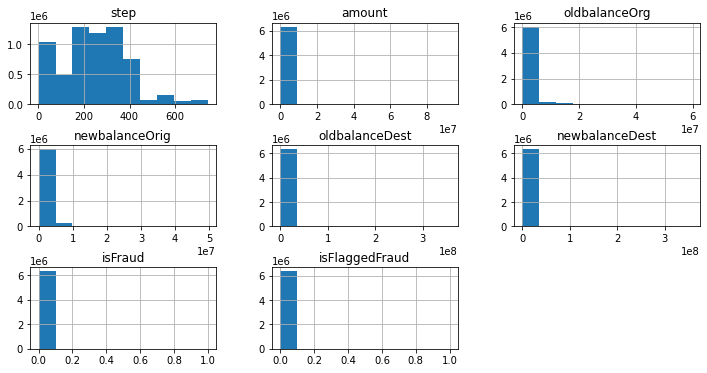

In [188]:
df.hist(figsize=(12,6))
plt.subplots_adjust(hspace=0.5);

In [189]:
df['amount'].mean()

179861.90354912292

In [190]:
df[df['amount'] < df['amount'].mean()].count().sum() / df.count().sum()

0.7050906701956112

70% of the dataset has transaction amounts less than $179,861. We still don't want to filter out any transactions that are outliers because those could be obvious transactions that are associated with fraud

In [191]:
df['newbalanceDest'].mean()

1224996.3982020712

In [192]:
df[df['newbalanceDest'] < df['newbalanceDest'].mean()].count().sum() / df.count().sum()

0.7659075978134794

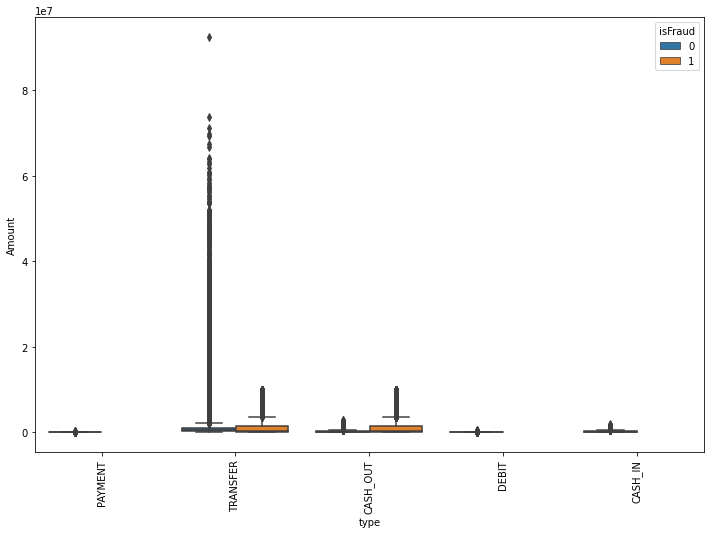

In [193]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.xticks(rotation='vertical')
plt.ylabel('Amount')
plt.xlabel('type');

Appears that all the fraud occurs in transfer or cash out types and is of lower amounts. Still we do not want to filter any outlier transactions right now since we want to be able to accurately model against good and bad transactions to minimize the number of false positives

In [194]:
df[df['oldbalanceDest']==0]['isFraud'].value_counts()

0    2699037
1       5351
Name: isFraud, dtype: int64

In [195]:
5351 / len(df[df['isFraud']==1])

0.6515280652623889

The old balance destination being 0 looks to be a big predictor of fraud as we can see that 65% of fraud is associated with accounts that have a 0 balance

In [196]:
df[df['oldbalanceOrg'] < df['oldbalanceOrg'].mean()]['isFraud'].value_counts()

0    5591039
1       5196
Name: isFraud, dtype: int64

In [197]:
5196 / len(df[df['isFraud']==1])

0.6326555460854743

The old balance origination being less than the mean looks like it could be a predictor of fraud as well

## Summary Statistics

In [198]:
fraud_summary = df.groupby('type').agg(
    unique_orig_accts=pd.NamedAgg(column='nameOrig', aggfunc='nunique'),
    unique_dest_accts=pd.NamedAgg(column='nameDest', aggfunc='nunique'),
    average_transaction_amount=pd.NamedAgg(column='amount', aggfunc='mean'),
    total_fraud=pd.NamedAgg(column='isFraud',aggfunc='sum'))

In [199]:
fraud_summary.head()

,unique_orig_accts,unique_dest_accts,average_transaction_amount,total_fraud
type,,,,
CASH_IN,1398845,446789,168920.242004,0
CASH_OUT,2236357,488975,176273.964346,4116
DEBIT,41432,38533,5483.665314,0
PAYMENT,2150401,2150401,13057.604660,0
TRANSFER,532839,237006,910647.009645,4097


In [200]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

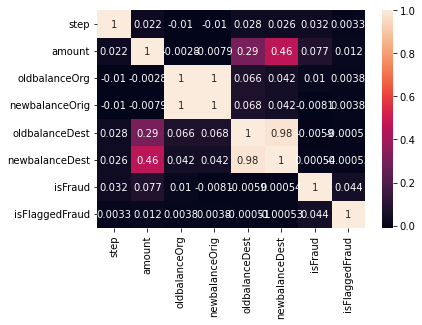

In [201]:
sns.heatmap(df.corr(method='pearson'), annot=True)

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


<AxesSubplot:>

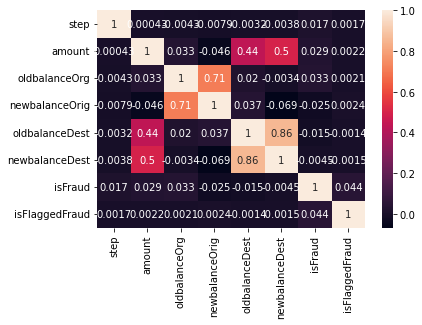

In [202]:
sns.heatmap(df.corr(method='kendall'), annot=True)

## Saving final file based on findings

Based from above, the most important features to potentially model on are based on type, amount, and the original and destination account values

In [203]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [204]:
processed_df = df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]

In [205]:
processed_df.to_csv('C:/Users/Raymnd Diaz/Desktop/Capstone2/processed_data.csv')